<a href="https://colab.research.google.com/github/kazimoto11/financial_inclusion_africa/blob/master/Financial_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading Packages**

In [0]:
from __future__ import print_function

import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from datetime import datetime
%matplotlib inline
#import tensorflow as tf

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

#**Loading Datasets**

In [9]:
from google.colab import files
uploaded = files.upload()

Saving Train_v2.csv to Train_v2 (2).csv


In [0]:
import io

In [11]:
train = pd.read_csv(io.BytesIO(uploaded['Train_v2.csv']))
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [12]:
uploaded = files.upload()

Saving VariableDefinitions (2).csv to VariableDefinitions (2).csv


In [13]:
variables = pd.read_csv(io.BytesIO(uploaded['VariableDefinitions (2).csv']))
variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [14]:
uploaded = files.upload()

Saving Test_v2.csv to Test_v2.csv


In [15]:
test = pd.read_csv(io.BytesIO(uploaded['Test_v2.csv']))
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [16]:
uploaded = files.upload()

Saving SubmissionFile.csv to SubmissionFile.csv


In [17]:
submissionSample = pd.read_csv(io.BytesIO(uploaded['SubmissionFile.csv']))
submissionSample.head()

,uniqueid,bank_account
0,uniqueid_7867 x Kenya,1.0
1,uniqueid_6722 x Kenya,0.0
2,uniqueid_6714 x Kenya,1.0
3,uniqueid_8103 x Kenya,1.0
4,uniqueid_8657 x Kenya,1.0


#**Exploratory Data Analysis**

---



##**Descriptive Statistics**

###**Data Summary**

In [19]:
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [20]:
test.describe()

,year,household_size,age_of_respondent
count,10086.000000,10086.000000,10086.000000
mean,2016.975907,3.778802,38.308348
std,0.847356,2.212721,16.270053
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,20.000000,100.000000


Only 3 numerical variables. This shows that the dataset involves alot of categorical features.

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


###**Check for missing values**

In [22]:
#Check for missing values in training set
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

No missing values in the training dataset

In [23]:
#Check for missing values in test set
test.isnull().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

No missing values in the test data set

## **Plotting univariate summaries of the data**

####**Target outcome - Bank Account** 

In [24]:
a = len(train[train.bank_account == "Yes"])
b = len(train[train.bank_account == "No"])
c = len(train)
print('We have an imbalanced dataset with a %i/%i ratio'%((b/c*100),(a/c*100)+1))

We have an imbalanced dataset with a 85/15 ratio


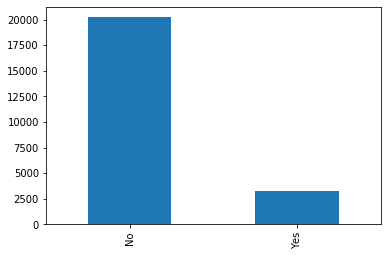

In [25]:
train["bank_account"].value_counts().plot(kind ="bar")

The above plot proves the presence of an imbalanced dataset as the target outcome has a majority class of people with "No" bank accounts.

####**Country**

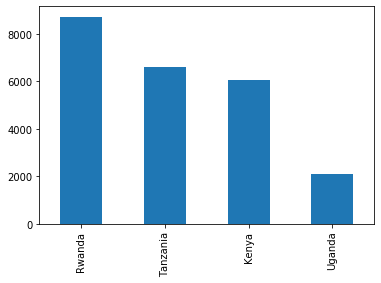

In [26]:
train["country"].value_counts().plot(kind ="bar")

Most of the data collected are in the order of Rwanda (8000+),Tanzania(6000+), Kenya(~6000) and lastly Uganda(<2000).

###**Year**

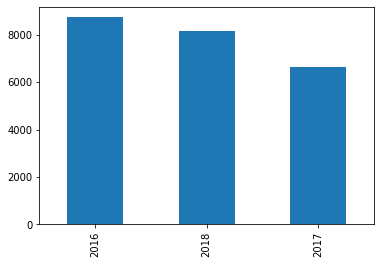

In [27]:
train["year"].value_counts().plot(kind = "bar")

Most data colleceted were from 2016.
Is it possible Rwanda's data was collected in 2016?

In [28]:
train[train["year"] == 2016]["country"].value_counts()

Rwanda    8735
Name: country, dtype: int64

All the data from 2016 were collected from Rwanda

In [29]:
train[train["year"] == 2017]["country"].value_counts()

Tanzania    6620
Name: country, dtype: int64

All the data from 2017 were collected from Tanzania

In [30]:
train[train["year"] == 2018]["country"].value_counts()

Kenya     6068
Uganda    2101
Name: country, dtype: int64

All the data from 2018 were collected from Kenya and Uganda

We do not need the year column because the country explains when the data was collected

###**Location** **type**

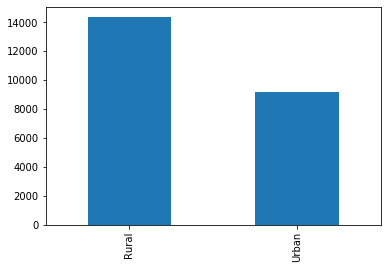

In [31]:
train.location_type.value_counts().plot(kind = "bar")


*   Majority of respondents were from the rural areas
*   Shows a possible relation between rural areas and no bank acc




###**Cellphone access**

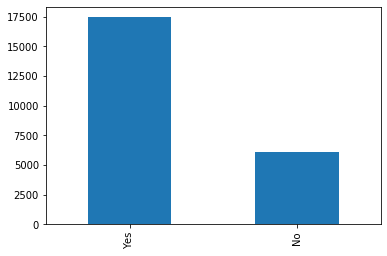

In [32]:
train.cellphone_access.value_counts().plot(kind = "bar")



*   Majority of respondents have access to cellphones
*   Questions the usability of feature relation to target outcome? Since majority of respondents have no bank accs



###**Household_size**

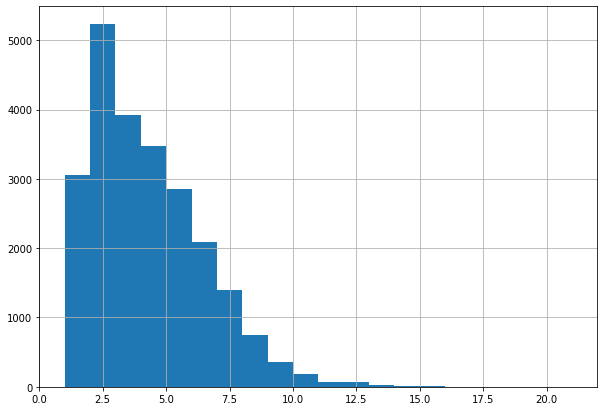

In [33]:
train.household_size.hist(bins = 20, figsize = [10,7])



*   The household_size is skewed towards the right.
*   A possible transformation is needed to get a uniform distribution.
*   Or categorizing the household_size to bins. 






###**Age_of_respondents**

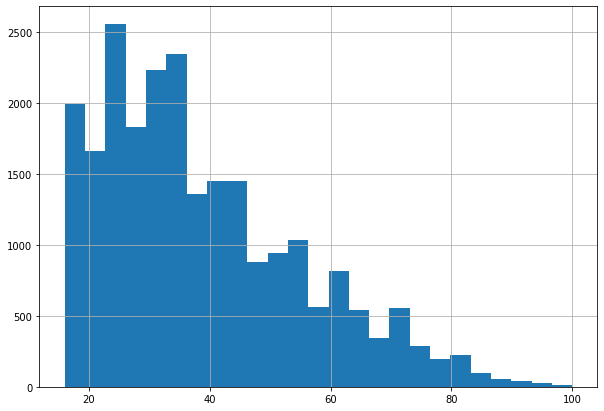

In [34]:
train.age_of_respondent.hist(bins =25, figsize = [10,7])

*   We have a skewed to the right distribution for this variable.
*   Lets try to make it look like a bit more Gaussian by applying x to log base 10 of x and sqrt.



###**Gender of respondent**

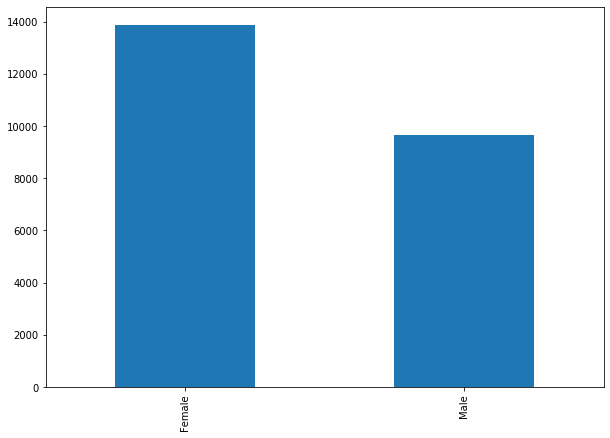

In [35]:
train.gender_of_respondent.value_counts().plot(kind = "bar", figsize = [10,7])



*   Majority of respondents were female.
*   Is there a relation to the fact most respondents were female thus affected to have a majority target outcome of no bank acc?



###**Relationship with head** 

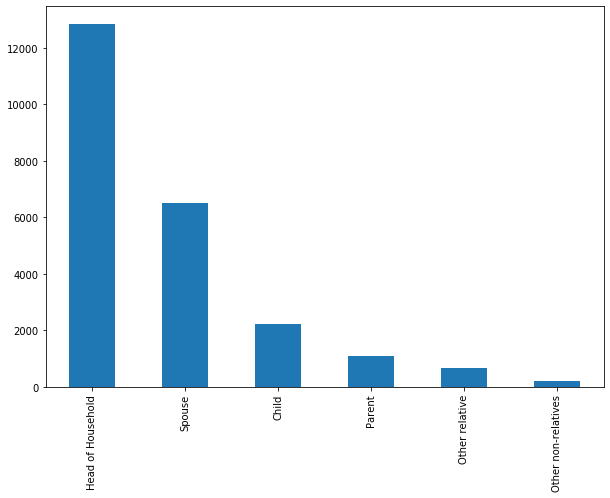

In [36]:
train.relationship_with_head.value_counts().plot(kind = "bar", figsize = [10,7])

*   Majority of respondents were either Head of house/ Spouse
*   Other categories are minority classes in the dataset



###**Marital Status**

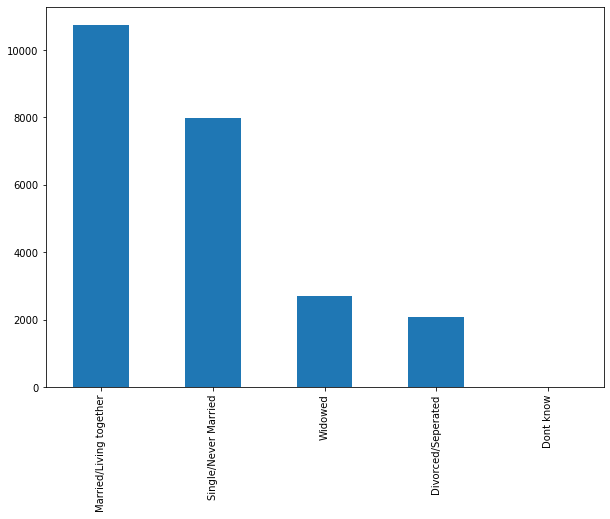

In [37]:
train.marital_status.value_counts().plot(kind ="bar", figsize = [10,7])



*   Majority are married and not married.
*   Which is two opposites of the same thing.
*   Check relationship with head of house, maybe?
*   I don't see a good feature here, maybe convinced later otherwise.





###**Education level**

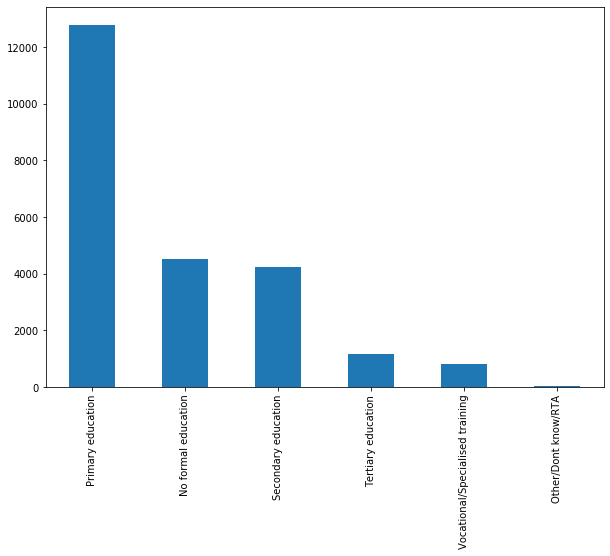

In [38]:
train.education_level.value_counts().plot(kind ="bar", figsize = [10,7])

Majority of respondents have primary education or no formal education



###**Job type** 

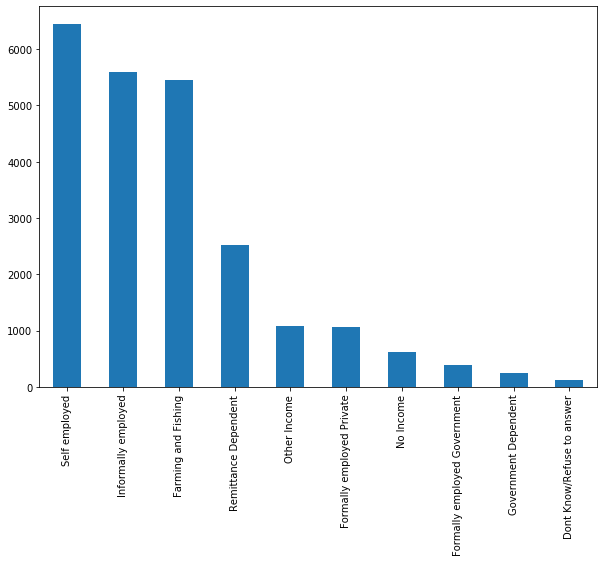

In [39]:
train.job_type.value_counts().plot(kind ="bar", figsize = [10,7])

## **Plotting multi-variate summaries of the data**

Target encoding of the bank account column

In [0]:
di = {"Yes": 1, "No": 0}
train.replace({"bank_account": di},inplace=True)

### **Country x Bank Acc**

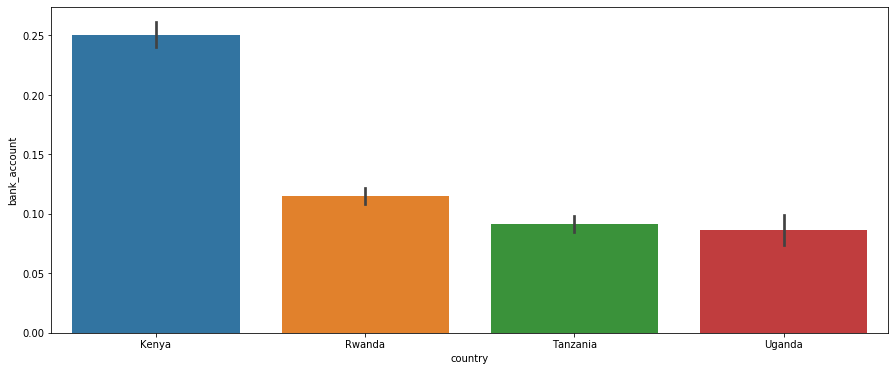

In [41]:
plt.figure(figsize=[15,6])
sns.barplot('country', 'bank_account', data=train)



*   Kenya has more people with bank accounts.
*   Uganda has the least people with bank accounts.



### **Gender of Respondent x Bank Acc**

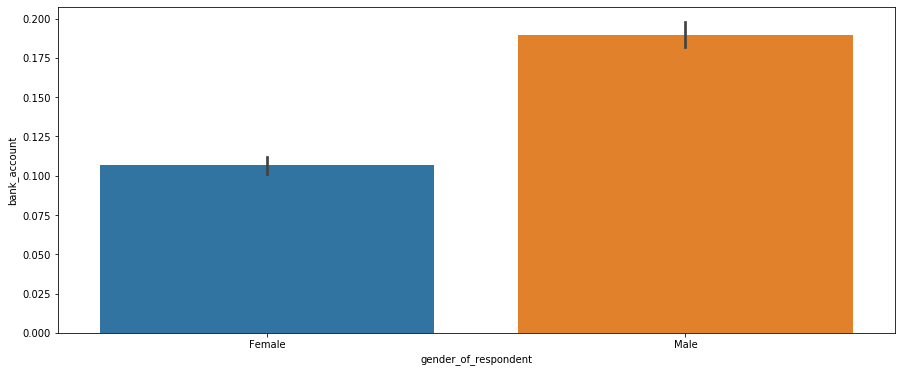

In [42]:
plt.figure(figsize=[15,6])
sns.barplot('gender_of_respondent', 'bank_account', data=train)

Even though majority of respondents are female, they have less number of bank accounts

###**Location type x Bank Acc**

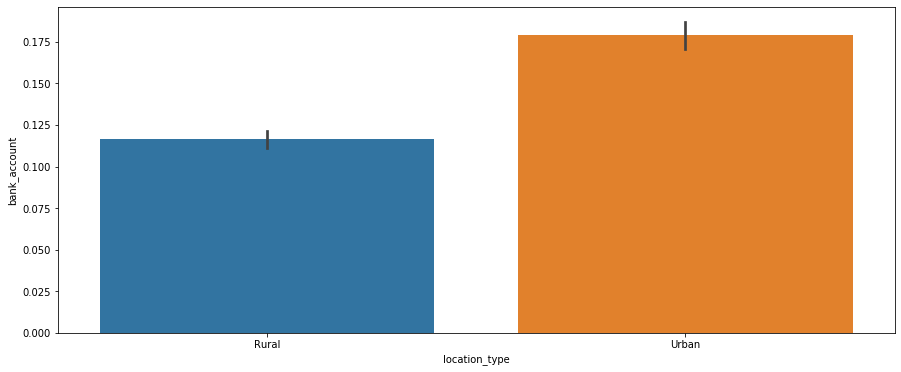

In [43]:
plt.figure(figsize=[15,6])
sns.barplot('location_type', 'bank_account', data=train)

As expected more people from Urban areas have more bank accounts than rural areas.

###**Cellphone Access X Bank Acc**

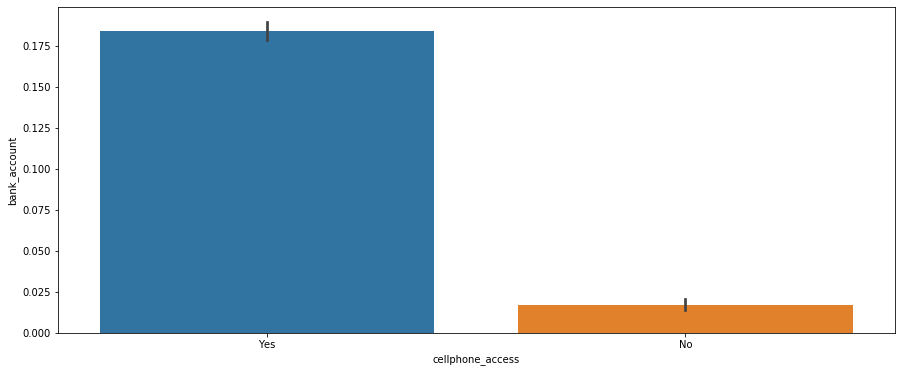

In [44]:
plt.figure(figsize=[15,6])
sns.barplot('cellphone_access', 'bank_account', data=train)



*   Proves that cellphone access has direct link to owning a bank acc.
*   Note: Majority of respondents have no access to bank accounts and cellphones.


### **Household size x Bank Acc**

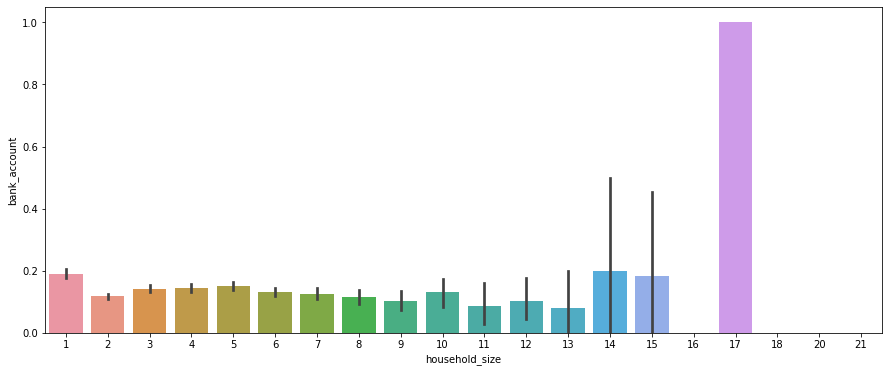

In [45]:
plt.figure(figsize=[15,6])
sns.barplot('household_size', 'bank_account', data=train)



*   The more number of people in a household from 1 to 9, showed a decrease of bank acc ownership
*   There seems to be an error/messy data in household size 17.



Create categorical features for household size so as to classify size by groups  1 to 4.


*   Size group 1-3   -> 1
*   Size group 4-7   -> 2
*   Size group 8-12  -> 3
*   Size group 13-17 -> 4


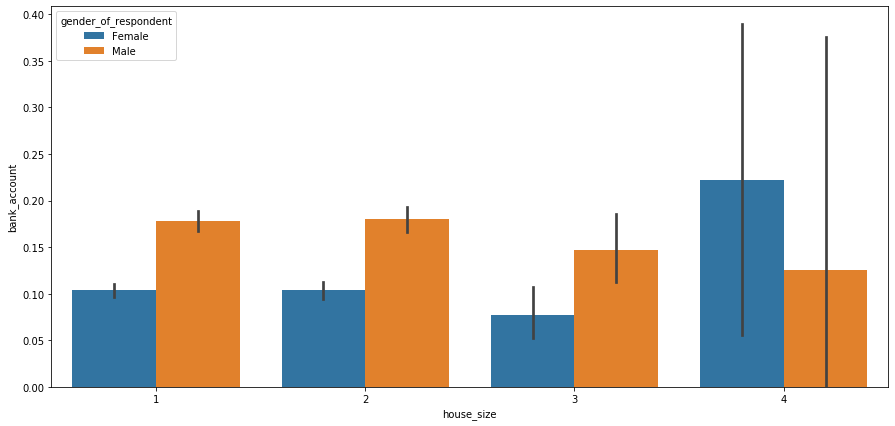

In [46]:
bins = [1, 4, 8, 13,17]
labels = [1,2,3,4]
train['house_size'] = pd.cut(train['household_size'], bins=bins, labels=labels)
train.head(5)

plt.figure(figsize = [15,7])
sns.barplot(x= "house_size", y = "bank_account", data = train, hue = "gender_of_respondent")



*   In households of more than 13 people there is a high chance of a respondent with a bank account.
*   Households 1-7 people have similar likeliness whislst 8-13 people have the lowest likeliness.
*   Females have more bank accounts than males living in a household of more than 13 people (Group 4)






In [47]:
bins = [1, 4, 8, 13,17]
labels = [1,2,3,4]
test['house_size'] = pd.cut(test['household_size'], bins=bins, labels=labels)
test.isnull().sum()

country                      0
year                         0
uniqueid                     0
location_type                0
cellphone_access             0
household_size               0
age_of_respondent            0
gender_of_respondent         0
relationship_with_head       0
marital_status               0
education_level              0
job_type                     0
house_size                1323
dtype: int64

### **Age of Respondent x Bank Acc**

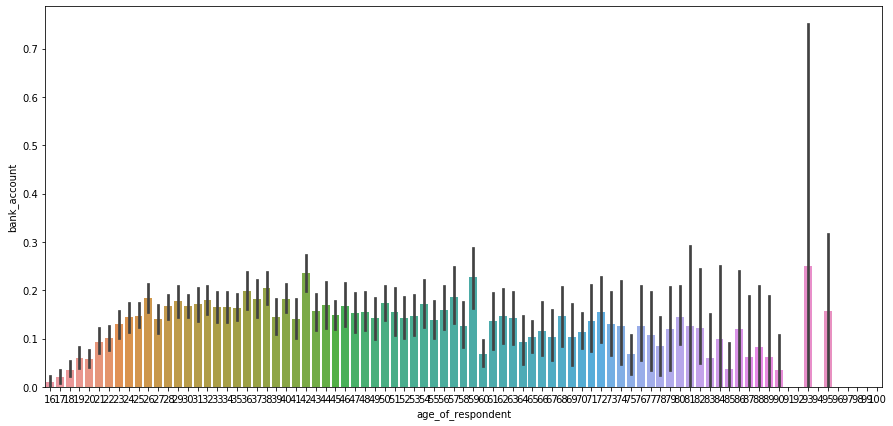

In [48]:
plt.figure(figsize=[15,7])
sns.barplot('age_of_respondent', 'bank_account', data=train)

Create categorical features for age of respondents so as to classify age by age group 1 to 4.


*   Age group 15-25  -> 1
*   Age group 25-45  -> 2
*   Age group 45-65  -> 3
*   Age group 65-100 -> 4





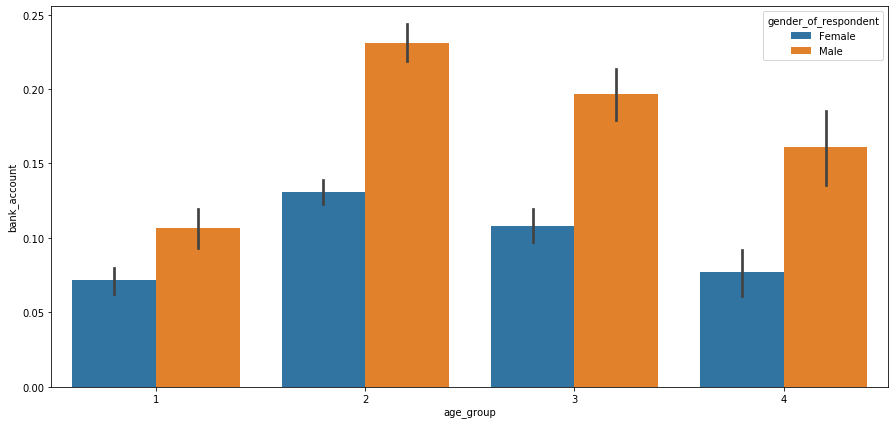

In [49]:
bins = [15, 25, 45, 65,100]
labels = [1,2,3,4]
train['age_group'] = pd.cut(train['age_of_respondent'], bins=bins, labels=labels)
train.head(5)

plt.figure(figsize = [15,7])
sns.barplot(x= "age_group", y = "bank_account", data = train, hue = "gender_of_respondent")

*   Age group 2 and 3 have the most people with bank accounts
*   Even though majority of respondents were female, more males have bank accounts in every age group



In [50]:
bins = [15, 25, 45, 65,100]
labels = [1,2,3,4]
test['age_group'] = pd.cut(test['age_of_respondent'], bins=bins, labels=labels)
test.head(5)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,house_size,age_group
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1,2
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,2,3
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,1,4
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,2,2
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,1,1


### **Education level x Bank Acc**

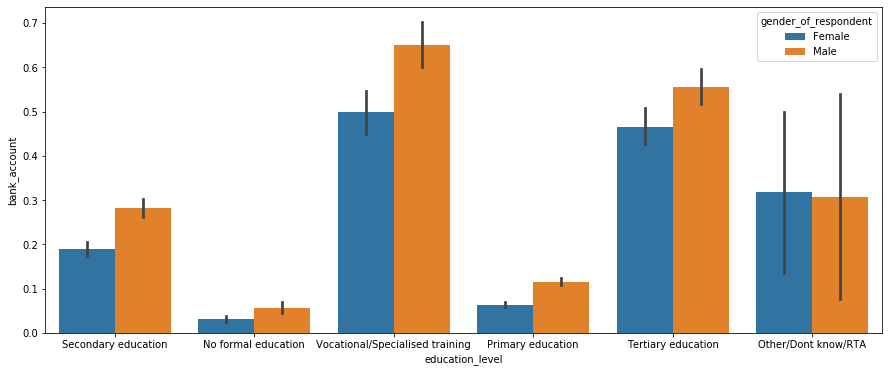

In [51]:
plt.figure(figsize=[15,6])
sns.barplot('education_level', 'bank_account', data=train, hue = "gender_of_respondent")

*   The higher the level the education the more likely a respondent has a bank account.
*   Males are more educated than female respondents.



### **Job type x Bank Acc**

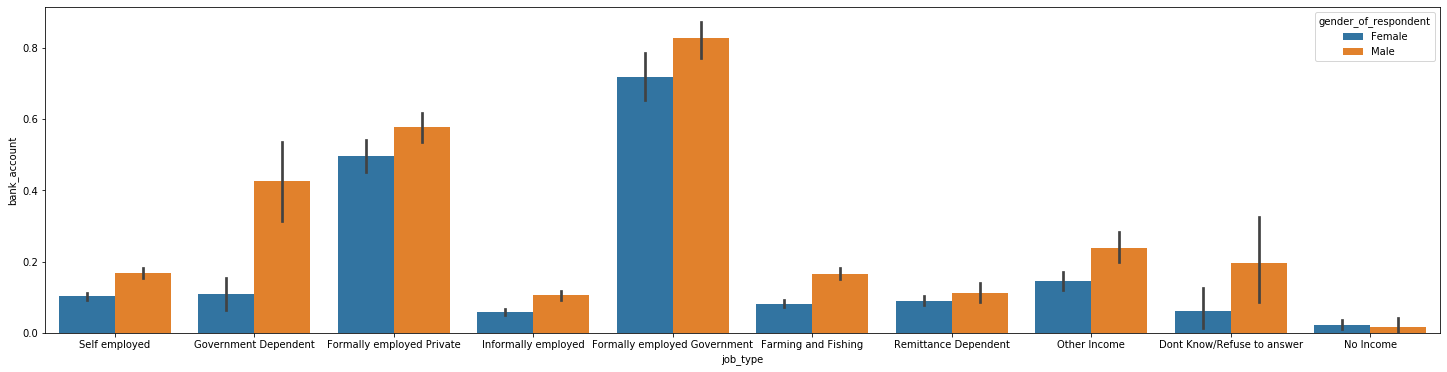

In [52]:
plt.figure(figsize=[25,6])
sns.barplot('job_type', 'bank_account', data=train, hue = "gender_of_respondent")



*   Formally employed people (Private/Gvt) have the most bank accs.  
*   All the other groups have low rates of having a bank acc.
*   Male who are government dependent have a high chance of having a bank acc.
*   Data imbalance between the formally employed and non-formally employed people?


Lets create a new column of formally and non-formally employed people.


*   Formal: "1"     -> Formally employed private and government
*   Non-formal: "0" -> Self employed, Gvt dependent, Informally employed, Farming& fising, Remittance dep, Other income, Don't know



In [53]:
qi = {"Self employed": 0, "Government Dependent": 0, "Formally employed Private": 1, "Informally employed": 0
      ,"Formally employed Government": 1, "Farming and Fishing": 0, "Remittance Dependent": 0,
      "Other Income": 0, "Dont Know/Refuse to answer": 0, "No Income": 0}

train.replace({"job_type": qi},inplace=True)
train.head()


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,house_size,age_group
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,0,1,1
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,0,2,4
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,0,2,2
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,1,2,2
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,0,2,2


In [54]:
qi = {"Self employed": 0, "Government Dependent": 0, "Formally employed Private": 1, "Informally employed": 0
      ,"Formally employed Government": 1, "Farming and Fishing": 0, "Remittance Dependent": 0,
      "Other Income": 0, "Dont Know/Refuse to answer": 0, "No Income": 0}

test.replace({"job_type": qi},inplace=True)
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,house_size,age_group
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,1,1,2
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,1,2,3
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,0,1,4
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,0,2,2
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,0,1,1


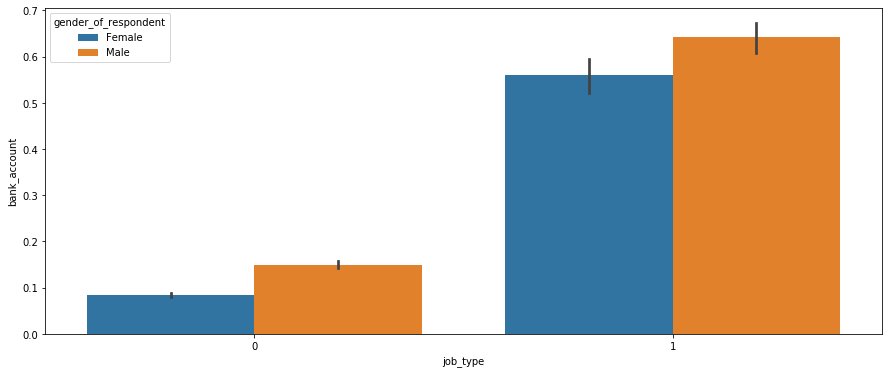

In [55]:
plt.figure(figsize=[15,6])
sns.barplot('job_type', 'bank_account', data=train, hue = "gender_of_respondent")

A better visual of job_type- categorizing it into two classes

#**Test Probing of the Test Set**

How was the split made?
Was it uniform or Random?


**Let's check ratios of the country variable**

In [56]:
a=len(test[test.country=='Rwanda'])
b=len(test[test.country=='Kenya'])
c=len(test[test.country=='Tanzania'])
d=len(test[test.country=='Uganda'])
f = len(test)
print('Rwanda %i%% Kenya %i%% Tanzania %i%% Uganda %i%%'%(a/f*100,b/f*100,c/f*100,d/f*100))

Rwanda 37% Kenya 25% Tanzania 28% Uganda 8%


In [57]:
a=len(train[train.country=='Rwanda'])
b=len(train[train.country=='Kenya'])
c=len(train[train.country=='Tanzania'])
d=len(train[train.country=='Uganda'])
f = len(train)
print('Rwanda %i%% Kenya %i%% Tanzania %i%% Uganda %i%%'%(a/f*100,b/f*100,c/f*100,d/f*100))

Rwanda 37% Kenya 25% Tanzania 28% Uganda 8%



The ratios are exactly the same for the train and test set. Again the split wasn't made on a random basis. Understanding how the split was made to create the test set helps give an idea on how to split your data when doing cross-validation.

#**Dataset Submission Format**


##**Training Set Submission Column**

In [58]:
train["uniqueid"] = train[["uniqueid", "country"]].agg(' x '.join, axis=1)
train["uniqueid"].head()

0    uniqueid_1 x Kenya
1    uniqueid_2 x Kenya
2    uniqueid_3 x Kenya
3    uniqueid_4 x Kenya
4    uniqueid_5 x Kenya
Name: uniqueid, dtype: object

In [59]:
train['uniqueid'].unique()

array(['uniqueid_1 x Kenya', 'uniqueid_2 x Kenya', 'uniqueid_3 x Kenya',
       ..., 'uniqueid_2115 x Uganda', 'uniqueid_2116 x Uganda',
       'uniqueid_2117 x Uganda'], dtype=object)

In [60]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,house_size,age_group
0,Kenya,2018,uniqueid_1 x Kenya,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,0,1,1
1,Kenya,2018,uniqueid_2 x Kenya,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,0,2,4
2,Kenya,2018,uniqueid_3 x Kenya,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,0,2,2
3,Kenya,2018,uniqueid_4 x Kenya,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,1,2,2
4,Kenya,2018,uniqueid_5 x Kenya,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,0,2,2


## **Test Set Submission Column**


In [61]:
test["uniqueid"] = test[["uniqueid", "country"]].agg(' x '.join, axis=1)
test["uniqueid"].head()

0    uniqueid_6056 x Kenya
1    uniqueid_6060 x Kenya
2    uniqueid_6065 x Kenya
3    uniqueid_6072 x Kenya
4    uniqueid_6073 x Kenya
Name: uniqueid, dtype: object

In [62]:
'''
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,["bank_account","location_type","cellphone_access", "gender_of_respondent",
	"relationship_with_head	marital_status","education_level","job_type"]] = \
X.loc[:,["bank_account","location_type","cellphone_access", "gender_of_respondent",
	"relationship_with_head	marital_status","education_level","job_type"]].apply(enc.fit_transform)
X.head()
'''

'\nfrom sklearn.preprocessing import LabelEncoder\nenc = LabelEncoder()\nX.loc[:,["bank_account","location_type","cellphone_access", "gender_of_respondent",\n\t"relationship_with_head\tmarital_status","education_level","job_type"]] = X.loc[:,["bank_account","location_type","cellphone_access", "gender_of_respondent",\n\t"relationship_with_head\tmarital_status","education_level","job_type"]].apply(enc.fit_transform)\nX.head()\n'

# **Feature Engineering**

## **Label Encoding**

In [0]:
ei = {"Rural": 1, "Urban": 0}
train.replace({"location_type": ei},inplace=True)
test.replace({"location_type": ei},inplace=True)

In [0]:
fi = {"Yes": 1, "No": 0}
train.replace({"cellphone_access": fi},inplace=True)
test.replace({"cellphone_access": fi},inplace=True)


In [65]:
train["education_level"].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

From EDA, education_level can be split into 3 categories;
*   Tertiary and Vocational training education - 2
*   Secondary education and Other/dk/RTA - 1
*   No formal and Primary eductaion - 0




In [0]:
gi = {'Secondary education': 1, 'No formal education': 0,
       'Vocational/Specialised training': 2, 'Primary education': 0,
       'Tertiary education' : 2, 'Other/Dont know/RTA' : 1}
train.replace({"education_level": gi},inplace=True)
test.replace({"education_level": gi},inplace=True)


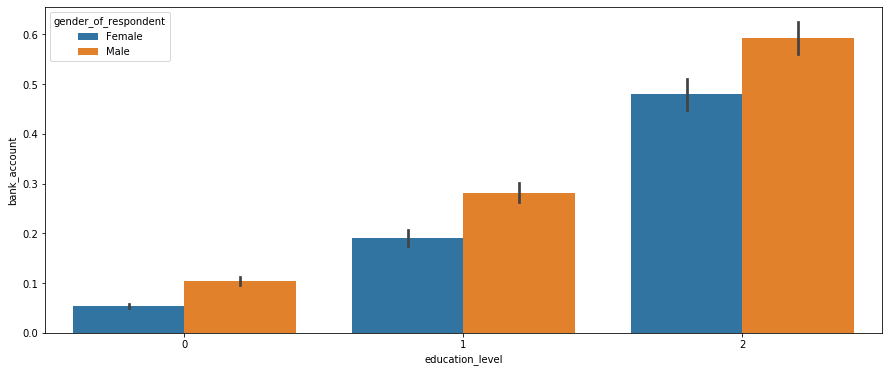

In [67]:
plt.figure(figsize=[15,6])
sns.barplot('education_level', 'bank_account', data=train, hue = "gender_of_respondent")

In [0]:
li = {"Female":0, "Male": 1}
train.replace({"gender_of_respondent": li},inplace=True)
test.replace({"gender_of_respondent": li},inplace=True)

In [0]:
ki = {"Rural":0, "Urban":1}
train.replace({"location_type": ki},inplace=True)
test.replace({"location_type": ki},inplace=True)

In [0]:
test.replace({"location_type": ki}, inplace=True)

In [0]:
train.head()

In [73]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,house_size,age_group
0,Kenya,2018,uniqueid_6056 x Kenya,0,1,3,30,1,Head of Household,Married/Living together,1,1,1,2
1,Kenya,2018,uniqueid_6060 x Kenya,0,1,7,51,1,Head of Household,Married/Living together,2,1,2,3
2,Kenya,2018,uniqueid_6065 x Kenya,1,0,3,77,0,Parent,Married/Living together,0,0,1,4
3,Kenya,2018,uniqueid_6072 x Kenya,1,0,6,39,0,Head of Household,Married/Living together,0,0,2,2
4,Kenya,2018,uniqueid_6073 x Kenya,0,0,3,16,1,Child,Single/Never Married,1,0,1,1


## **Features**

###**Training set**


In [75]:
X = train[["location_type", "cellphone_access","household_size", 
               "age_group","gender_of_respondent","education_level","job_type"]]
X.head()

,location_type,cellphone_access,household_size,age_group,gender_of_respondent,education_level,job_type
0,1,1,3,1,0,1,0
1,1,0,5,4,0,0,0
2,0,1,5,2,1,2,0
3,1,1,5,2,0,0,1
4,0,0,8,2,1,0,0


In [76]:
y = train["bank_account"]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int64

###**Test Set**

In [77]:
test_X = test[["location_type", "cellphone_access", "household_size", 
               "age_group", "gender_of_respondent","education_level", "job_type"]]
test_X.head()

,location_type,cellphone_access,household_size,age_group,gender_of_respondent,education_level,job_type
0,0,1,3,2,1,1,1
1,0,1,7,3,1,2,1
2,1,0,3,4,0,0,0
3,1,0,6,2,0,0,0
4,0,0,3,1,1,1,0


**Concatenating the training set X and test set test_X to produce the data set to predict the final dataframe and to join their uniqueIDS as well**

In [78]:
#training set 
#adding uniqueid to X_1 dataframe
X_1 = X.copy()
X_1["uniqueid"] = train["uniqueid"]
X_1.head()

,location_type,cellphone_access,household_size,age_group,gender_of_respondent,education_level,job_type,uniqueid
0,1,1,3,1,0,1,0,uniqueid_1 x Kenya
1,1,0,5,4,0,0,0,uniqueid_2 x Kenya
2,0,1,5,2,1,2,0,uniqueid_3 x Kenya
3,1,1,5,2,0,0,1,uniqueid_4 x Kenya
4,0,0,8,2,1,0,0,uniqueid_5 x Kenya


In [79]:
#testing set 
#adding uniqueid to test_X_1 dataframe
test_X_1 = test_X.copy()
test_X_1["uniqueid"] = test["uniqueid"]
test_X_1.head()

,location_type,cellphone_access,household_size,age_group,gender_of_respondent,education_level,job_type,uniqueid
0,0,1,3,2,1,1,1,uniqueid_6056 x Kenya
1,0,1,7,3,1,2,1,uniqueid_6060 x Kenya
2,1,0,3,4,0,0,0,uniqueid_6065 x Kenya
3,1,0,6,2,0,0,0,uniqueid_6072 x Kenya
4,0,0,3,1,1,1,0,uniqueid_6073 x Kenya


In [80]:
#Dataframe X and test_X will be used for training and prediction
#Concatenate X_1 & test_X_1 for submission dataframe
submission_df = pd.concat([X, test_X])
submission_df.isnull().sum()

location_type           0
cellphone_access        0
household_size          0
age_group               0
gender_of_respondent    0
education_level         0
job_type                0
dtype: int64

In [81]:
#Dataframe X and test_X will be used for training and prediction
#Concatenate X_1 & test_X_1 for submission dataframe
submission_df_1 = pd.concat([X_1, test_X_1])
submission_df_1.tail()

,location_type,cellphone_access,household_size,age_group,gender_of_respondent,education_level,job_type,uniqueid
10081,1,0,2,3,0,0,0,uniqueid_2998 x Uganda
10082,0,1,8,2,1,0,0,uniqueid_2999 x Uganda
10083,0,1,1,2,1,1,0,uniqueid_3000 x Uganda
10084,1,1,6,2,0,0,0,uniqueid_3001 x Uganda
10085,0,1,7,1,1,1,0,uniqueid_3002 x Uganda


##**Train - Test Split**

In [0]:
from sklearn.model_selection import train_test_split

In [83]:
# Splitting the training set to Training 0.7, Test 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
X_train.shape

(16466, 7)

In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16466 entries, 7228 to 17163
Data columns (total 7 columns):
location_type           16466 non-null int64
cellphone_access        16466 non-null int64
household_size          16466 non-null int64
age_group               16466 non-null category
gender_of_respondent    16466 non-null int64
education_level         16466 non-null int64
job_type                16466 non-null int64
dtypes: category(1), int64(6)
memory usage: 916.8 KB


## **SMOTE - Synthetic Model Over-Sampling Technique**

In [85]:
pip install imblearn

In [86]:
from imblearn.over_sampling import SMOTE
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Smote can't handle categorical features, hence should convert them to int

In [87]:
"""
X_train = X_train.astype({"house_size": int, "age_group": int})
X_test = X_test.astype({"house_size": int, "age_group": int})
X = X.astype({"house_size": int, "age_group": int})
"""

'\nX_train = X_train.astype({"house_size": int, "age_group": int})\nX_test = X_test.astype({"house_size": int, "age_group": int})\nX = X.astype({"house_size": int, "age_group": int})\n'

In [0]:
X_train = X_train.astype({"age_group": int})
X_test = X_test.astype({"age_group": int})
X = X.astype({"age_group": int})

In [0]:
#Using Synthetic Minority Over-Sampling Technique (SMOTE) to balance the dataset
smote_algo = SMOTE()

In [90]:
smote_data_X, smote_data_Y = smote_algo.fit_sample(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [91]:
#Shows the over-sampling of the data to produce a balanced dataset
print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(smote_data_Y))

Before Smote:  Counter({0: 14168, 1: 2298})
After Smote:  Counter({0: 14168, 1: 14168})


#**Logistic Regression Model** 

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
lm = LogisticRegression()

In [95]:
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic regression model - lm of unbalanced training set

In [0]:
predictions = lm.predict(X_test)

Predictions of unbalanced data set pf the model to predict the y_test from X_test

In [97]:
pd.crosstab(y_test,predictions)

col_0,0,1
bank_account,,
0,5923,121
1,746,268


This shows that model lm is 97.3% accurate to predict people with "No" = 0 bank accounts & 20.7% accurate to predict people with "Yes" = 1 bank accounts

In [98]:
accuracy_score(y_test, predictions)

0.8771606687446869

Using accuracy score it is seen that the model is 86% overall accurate.Even though it performs poorly in determining people with bank accounts ("Yes" = 1),because is an imbalanced dataset.

If the model predicted all people don't have a bank account it would have been 85% accurate since the split is
Bank account => "No" = 0 is 85.95% & Bank account => "Yes" = 1 is 14.05%.

Thus it is an unacceptable model.

In [99]:
lm_2 = LogisticRegression()
lm_2.fit(smote_data_X, smote_data_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model lm_2 which learns from a balanced dataset

In [0]:
predictions_2 = lm_2.predict(X_test)

In [101]:
print(classification_report(y_test,predictions_2))

NameError: ignored

Using model lm_2 to predict the X_test so as to analyse the model performance in comparison to model lm

In [103]:
pd.crosstab(y_test,predictions_2)

col_0,0,1
bank_account,,
0,4525,1519
1,303,711


This shows that model lm_2 is 71.3% accurate to predict people with "No" = 0 bank accounts.A decrease from 97.3% to 71.3% which has to be further analyzed and improved on 71.8% accurate to predict people with "Yes" = 1 bank accounts.
A jump from 20.7% to 71.8% to predict individuals with bank accounts{Yes: 1}.

In [104]:
accuracy_score(y_test, predictions_2)

0.7418532162085577

Accuracy score has dropped from 86.5% to 71.3% due to the drop in performance in predicting people with No bank acc {No: 0}

In [0]:
#To use lm_2 to predict the whole training set X
training_pred = lm_2.predict(X)

In [106]:
pd.crosstab(y,training_pred)

col_0,0,1
bank_account,,
0,15170,5042
1,944,2368


Using the whole training dataset.71.2% accurate 0.72.3% accurate 1

In [107]:
accuracy_score(y, training_pred)

0.7455364733888794

# **KNN-Classifier**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

Prediction for unbalanced dataset

In [0]:
knn = KNeighborsClassifier(n_neighbors=21)

In [110]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(X_test)

Prediction for over-sampled balanced dataset

In [0]:
knn_2 = KNeighborsClassifier(n_neighbors= 27)

In [113]:
knn_2.fit(smote_data_X, smote_data_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=27, p=2,
                     weights='uniform')

In [0]:
pred_2 = knn_2.predict(X_test)

## **K value** 

In [0]:
error_rate = []

for i in range(1,40):
  
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(smote_data_X, smote_data_Y)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

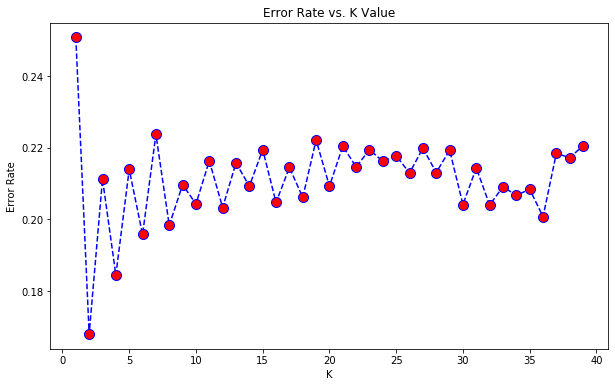

In [117]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## **Evaluate KNN model**



In [0]:
from sklearn.metrics import classification_report,confusion_matrix

Imbalanced dataset prediction

In [119]:
pd.crosstab(y_test,pred)

col_0,0,1
bank_account,,
0,5933,111
1,757,257


In [120]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6044
           1       0.70      0.25      0.37      1014

    accuracy                           0.88      7058
   macro avg       0.79      0.62      0.65      7058
weighted avg       0.86      0.88      0.85      7058



Over-sampled dataset prediction

In [121]:
pd.crosstab(y_test,pred_2)

col_0,0,1
bank_account,,
0,4839,1205
1,347,667


In [122]:
print(classification_report(y_test,pred_2))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      6044
           1       0.36      0.66      0.46      1014

    accuracy                           0.78      7058
   macro avg       0.64      0.73      0.66      7058
weighted avg       0.85      0.78      0.80      7058



#**Decision Tree & Random Forest**

##**Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [126]:
dtree.fit(smote_data_X, smote_data_Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
pred_tree = dtree.predict(X_test)

In [128]:
pd.crosstab(y_test, pred_tree)

col_0,0,1
bank_account,,
0,5080,964
1,440,574


In [129]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      6044
           1       0.37      0.57      0.45      1014

    accuracy                           0.80      7058
   macro avg       0.65      0.70      0.66      7058
weighted avg       0.84      0.80      0.82      7058



## **Random Forest**

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(smote_data_X, smote_data_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
pred_rf = rfc.predict(X_test)

In [132]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      6044
           1       0.37      0.57      0.45      1014

    accuracy                           0.80      7058
   macro avg       0.65      0.71      0.66      7058
weighted avg       0.84      0.80      0.82      7058



In [133]:
pd.crosstab(y_test,pred_rf)

col_0,0,1
bank_account,,
0,5071,973
1,435,579


# **XGBoost**

In [0]:
import xgboost as xgb

In [156]:
xgb_train_smote = xgb.DMatrix(smote_data_X, label = smote_data_Y)

xgb_train = xgb.DMatrix(X_train,y_train)
xgb_test = xgb.DMatrix(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
params = {
    "max_depth":5,
    "eta":0.15,
    "objective":"binary:hinge",
    "num_class":2,
    "min_child_weight":1
}
epochs = 1000

In [188]:
xgb_model = xgb.train(params = params,dtrain = xgb_train,num_boost_round = epochs)

XGBoostError: ignored

In [0]:
xgb_pred = xgb_model.predict(xgb_test)

In [186]:
pd.crosstab(y_test,xgb_pred)

col_0,0.0,1.0
bank_account,,
0,5875,169
1,712,302


#**Submission** 

In [0]:
submission_pred = knn_2.predict(submission_df)

In [136]:
submission_pred = pd.DataFrame(submission_pred)
submission_pred.tail()

,0
33605,0
33606,0
33607,0
33608,0
33609,0


In [137]:
result = submission_df_1['uniqueid'].copy()
result = pd.DataFrame(result)
result['bank_account'] = submission_pred
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33610 entries, 0 to 10085
Data columns (total 2 columns):
uniqueid        33610 non-null object
bank_account    33610 non-null int64
dtypes: int64(1), object(1)
memory usage: 787.7+ KB


In [0]:
result = result.astype({"uniqueid": str, "bank_account": float})

In [139]:
# made a mistake naming the column of uniqueid to unique_id
result.rename(columns={"uniqueid": "uniqueid"}, inplace =True)
result.tail()

,uniqueid,bank_account
10081,uniqueid_2998 x Uganda,0.0
10082,uniqueid_2999 x Uganda,0.0
10083,uniqueid_3000 x Uganda,0.0
10084,uniqueid_3001 x Uganda,1.0
10085,uniqueid_3002 x Uganda,1.0


In [0]:
result.to_csv('result.csv', sep=',', index = False,)

In [0]:
from google.colab import files
files.download("result.csv")